<a href="https://colab.research.google.com/github/greenpenguinkaa/greenpenguinkaa/blob/main/face_eyes_blur_found.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

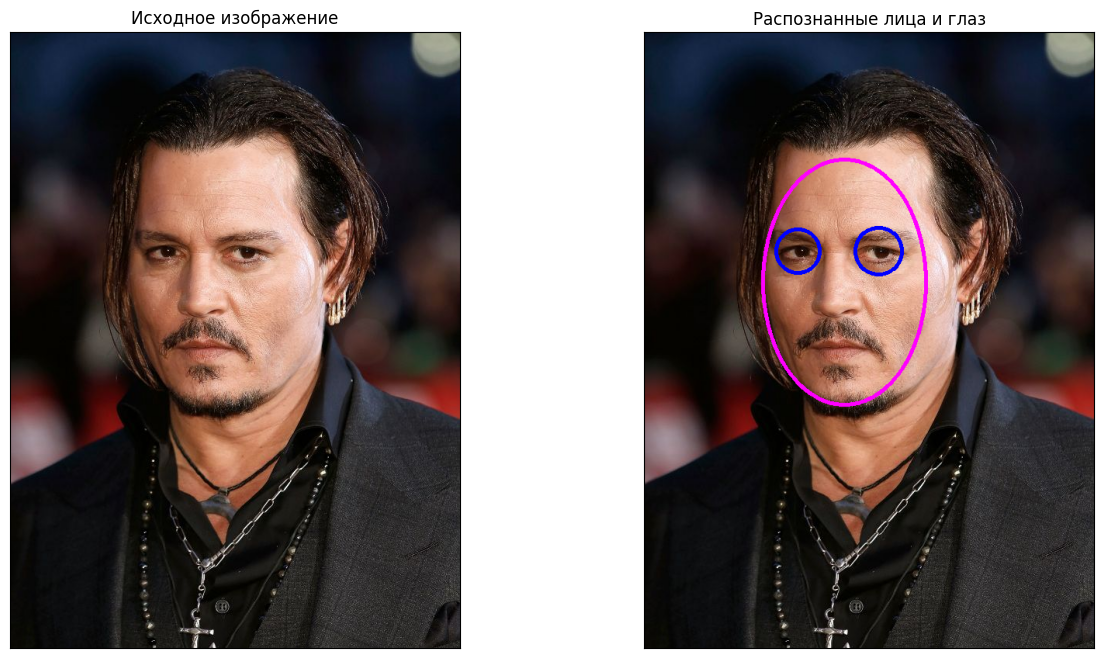

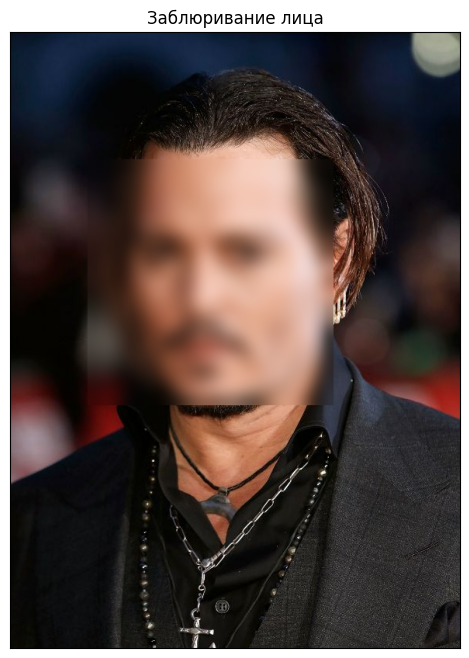

In [ ]:
import cv2
import gdown
from matplotlib import pyplot
import numpy as np
# Команда обеспечивает вывод графиков в Google Colaboratory
%matplotlib inline


# Загрузка изображения
img = cv2.imread('Depp.jpg')

# Просто присвоить значение мы не можем, так как произойдет просто присваивание по ссылке
# т.е. обе переменые будут ссылаться на одну и ту же область памяти
# изменение одной переменной привет к изменению другой
img2 = img.copy() # копирование переменной
img3 = img.copy()

# загрузка каскада Хаара
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# загрузка каскада Хаара для поиска глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img)

frame_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
frame_gray = cv2.equalizeHist(frame_gray)

for (x,y,w,h) in bboxes:
    center = (x + w//2, y + h//2)
    frame = cv2.ellipse(img2, center, (w//3, h//2), 0, 0, 360, (255, 0, 255), 4)

    # выполнение распознавания глаз
    eye = frame_gray[y:y+h,x:x+w]
    eyes = classifier_eye.detectMultiScale(eye, scaleFactor=1.2, minNeighbors=40, minSize=(20, 20))

    for (sx, sy, sw, sh) in eyes:
            # отрисовка прямоугольника около глаз
            # cv2.circle(img, center_coordinates, radius, color, thickness)
            eye_center = (x + sx + sw//2, y + sy + sh//2)
            radius = int(round((sw + sh)*0.25))
            cv2.circle(img2, eye_center, radius, (255, 0, 0 ), 4)
            blur_face = img3[y:y+h, x:x+w]
            blur_face = cv2.GaussianBlur(blur_face,(23, 23), 30)
            img3[y:y+blur_face.shape[0], x:x+blur_face.shape[1]] = blur_face



gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#read the harr_face_detect_classifier.xml
# harr_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "harr_face_detect_classifier.xml")

# face_cords = harr_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=1 )
# print(face_cords)
# for x, y, w, h in bboxes:
#     blur_face = img3[y:y+h, x:x+w]
#     blur_face = cv2.GaussianBlur(blur_face,(23, 23), 30)
#     img3[y:y+blur_face.shape[0], x:x+blur_face.shape[1]] = blur_face


fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Распознанные лица и глаз')

fig, (ax3) = pyplot.subplots(1, figsize=(15, 8))
ax3.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax3.xaxis.set_ticks([])
ax3.yaxis.set_ticks([])
ax3.set_title('Заблюривание лица')

pyplot.show()

Text(0.5, 1.0, 'Очки')

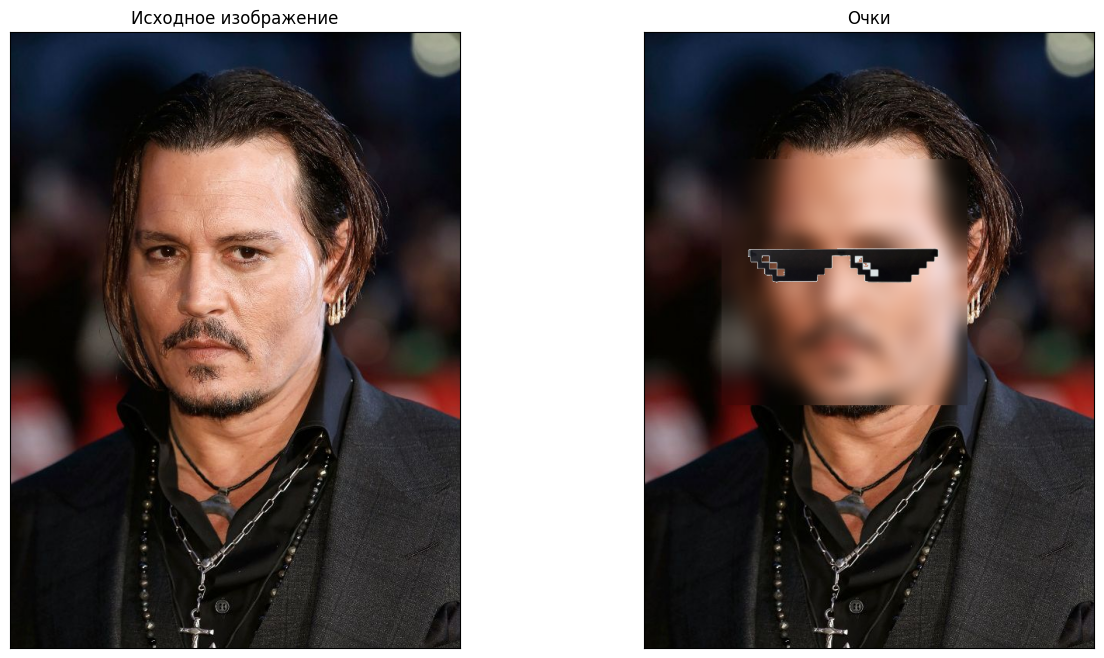

In [ ]:
import cv2

# Чтение изображения
img = cv2.imread("Depp.jpg")
img2 = img.copy()
glasses = cv2.imread('glasses.png')

# Загрузка каскада Хаара для лиц
classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Выполнение распознавания лиц
bboxes = classifier.detectMultiScale(img, scaleFactor=2, minNeighbors=3, minSize=(50, 50))

# Загрузка каскада Хаара для глаз
classifier_eye = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

frame_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
frame_gray = cv2.equalizeHist(frame_gray)

for (x, y, w, h) in bboxes:

    # Выполнение распознавания глаз
    eye = frame_gray[y:y + h, x:x + w]
    eyes = classifier_eye.detectMultiScale(eye, scaleFactor=1.2, minNeighbors=40, minSize=(20, 20))

    if h > 0 and w > 0:
        # Изменение размеров для наложения очков
        glasses_height = int(3 * h / 5)  # Высота очков
        glasses_width = int(3.5 * w / 5)  # Ширина очков
        y_offset = y + int(h / 6) - 10  # Смещение по вертикали
        x_offset = x+50  # Смещение по горизонтали

        # Определение области интереса для лица
        img_roi = img3[y_offset:y_offset + glasses_height, x_offset:x_offset + glasses_width]

        # Изменение размера очков
        glasses_small = cv2.resize(glasses, (glasses_width, glasses_height), interpolation=cv2.INTER_AREA)
        gray_glasses = cv2.cvtColor(glasses_small, cv2.COLOR_BGR2GRAY)

        ret, mask = cv2.threshold(gray_glasses, 230, 255, cv2.THRESH_BINARY_INV)
        mask_inv = cv2.bitwise_not(mask)
        masked_face = cv2.bitwise_and(glasses_small, glasses_small, mask=mask)

        masked_frame = cv2.bitwise_and(img_roi, img_roi, mask=mask_inv)
        img3[y_offset:y_offset + glasses_height, x_offset:x_offset + glasses_width] = cv2.add(masked_face, masked_frame)

# Отображение результата
fig, (ax1, ax2) = pyplot.subplots(1, 2, figsize=(15, 8))
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax1.xaxis.set_ticks([])
ax1.yaxis.set_ticks([])
ax1.set_title('Исходное изображение')

ax2.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
ax2.xaxis.set_ticks([])
ax2.yaxis.set_ticks([])
ax2.set_title('Очки')